#### Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal? 🡪5 marks

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Read the Data

In [2]:
# read the data_copy
data = pd.read_csv('bank.csv',delimiter=";")

# print the first five rows of the data_copy
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Copying the data

In [3]:
data_copy= data.copy()

## Data Types and Dimensions

In [4]:
# check the data types for variables
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# get the shape
print(data_copy.shape)

(41188, 21)


**The dataframe has 21 columns and 41188 observations**

**Checking the target variable.**

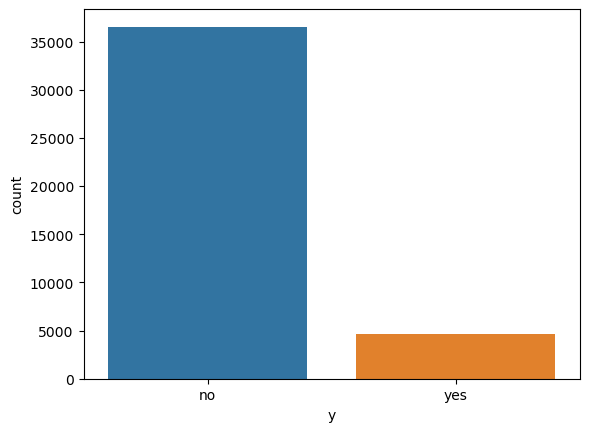

Number of Client subscribed :  36548
Number of Clients not subscribed  :  4640


In [6]:
ax = sns.countplot(x=data_copy['y'],label="Count")     
plt.show()
S, N = data_copy['y'].value_counts()
print('Number of Client subscribed : ',S)
print('Number of Clients not subscribed  : ',N)

#### We see that the data is imbalanced

## Statistic of the Data
Here we take a look at the summary of each attribute. 

In [7]:
# data frame with numerical features
data_copy.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
# data frame with categorical features
data_copy.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


##  Correlation


In [9]:
# check correlation
data_num = data.copy()
corr = data_num.corr()
corr

C:\Users\Kunal s\AppData\Local\Temp\ipykernel_12728\962963917.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_num.corr()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


C:\Users\Kunal s\AppData\Local\Temp\ipykernel_12728\1741580242.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


<Axes: >

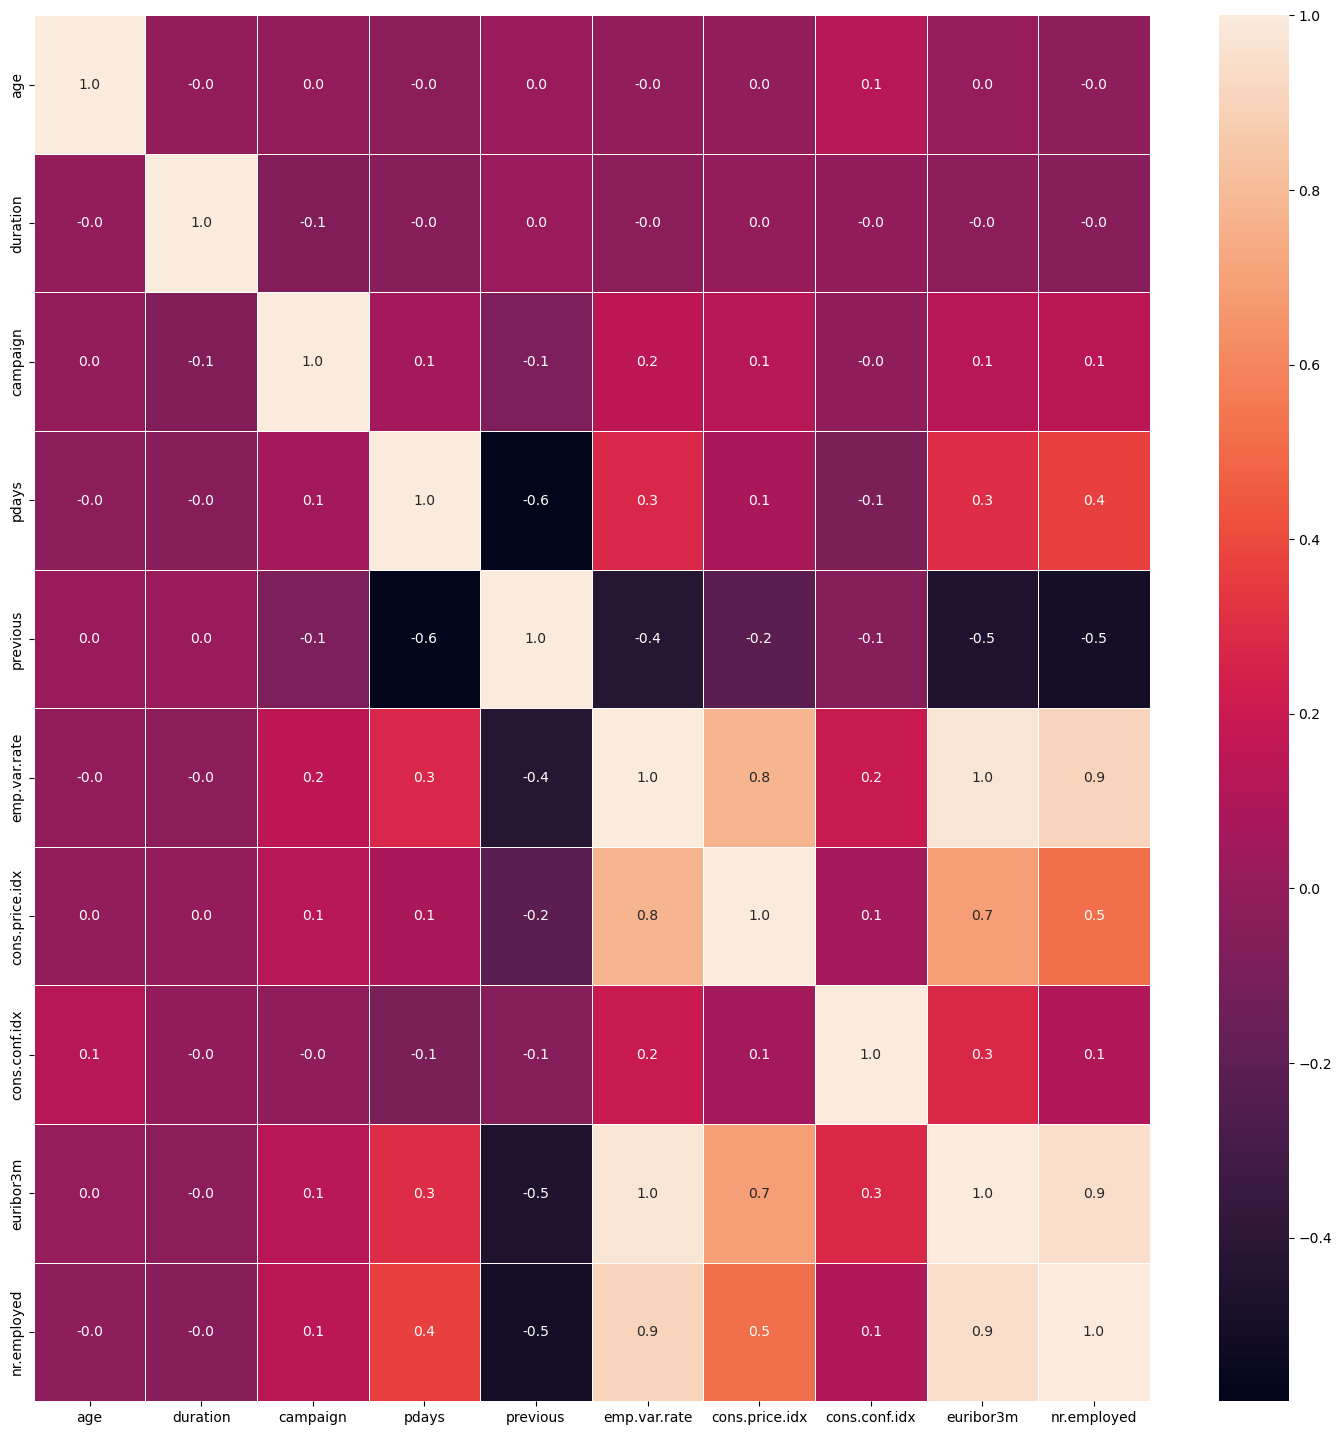

In [10]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


1. To mitigate the impact of call duration, a transformation is necessary since it is the most strongly correlated feature with the target variable.
   
2. Features like employment rate, consumer confidence index, and consumer price index offer diverse perspectives on clients' socio-economic status. Including them can enhance the model's ability to make predictions that generalize well by capturing variations across different socio-economic dimensions..


***Q.2. Perform the following pre-processing tasks: 🡪10 marks
a. Missing Value Analysis
b. Label Encoding wherever required
c. Selecting important features based on Decision Trees
d. Handling unbalanced data using SMOTE
e. Standardize the data using any one of the scalers provided by sklearn***

## Missing  Value


In [11]:
# print the count of missing values
print(data_copy.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### There are no missing values present in the data.


## Label Encoding for Target Variable
## Cleaning the data



In [12]:
# Convert target variable into numeric
data_copy.y = data_copy.y.map({'no':0, 'yes':1})

In [13]:
data_copy.contact = data_copy.contact.map({'cellular': 1, 'telephone': 0}).astype('uint8') 
data_copy.loan = data_copy.loan.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
data_copy.housing = data_copy.housing.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
data_copy.default = data_copy.default.map({'no': 1, 'unknown': 0, 'yes': 0}).astype('uint8')
data_copy.pdays = data_copy.pdays.replace(999, 0) # replace with 0 if not contact 
data_copy.previous = data_copy.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8')
data_copy.poutcome = data_copy.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 

In [14]:
# change the range of Var Rate
data_copy['emp.var.rate'] = data_copy['emp.var.rate'].apply(lambda x: x*-0.0001 if x > 0 else x*1)
data_copy['emp.var.rate'] = data_copy['emp.var.rate'] * -1
data_copy['emp.var.rate'] = data_copy['emp.var.rate'].apply(lambda x: -np.log(x) if x < 1 else np.log(x)).astype('uint8')

In [15]:
# Multiply consumer index 
data_copy['cons.price.idx'] = (data_copy['cons.price.idx'] * 10).astype('uint8')

In [16]:
# change the sign (we want all be positive values)
data_copy['cons.conf.idx'] = data_copy['cons.conf.idx'] * -1

In [17]:
# re-scale variables
data_copy['nr.employed'] = np.log2(data_copy['nr.employed']).astype('uint8')
data_copy['cons.price.idx'] = np.log2(data_copy['cons.price.idx']).astype('uint8')
data_copy['cons.conf.idx'] = np.log2(data_copy['cons.conf.idx']).astype('uint8')

In [18]:
# less space
data_copy.euribor3m = data_copy.euribor3m.astype('uint8')
data_copy.campaign = data_copy.campaign.astype('uint8')
data_copy.pdays = data_copy.pdays.astype('uint8')

In [19]:
# fucntion to One Hot Encoding
def encode(data_copy, col):
    return pd.concat([data_copy, pd.get_dummies(col, prefix=col.name)], axis=1)

In [20]:
data_copy.loc[data_copy['duration'] <= 102, 'duration'] = 1
data_copy.loc[(data_copy['duration'] > 102) & (data_copy['duration'] <= 180)  , 'duration'] = 2
data_copy.loc[(data_copy['duration'] > 180) & (data_copy['duration'] <= 319)  , 'duration'] = 3
data_copy.loc[(data_copy['duration'] > 319) & (data_copy['duration'] <= 645), 'duration'] = 4
data_copy.loc[data_copy['duration']  > 645, 'duration'] = 5

In [21]:
# One Hot encoding of 3 variable 
data_copy = encode(data_copy, data_copy.job)
data_copy = encode(data_copy, data_copy.month)
data_copy = encode(data_copy, data_copy.day_of_week)

In [22]:
# Drop tranfromed features
data_copy.drop(['job', 'month', 'day_of_week'], axis=1, inplace=True)

### Droping duplicates

In [23]:
data_copy.drop_duplicates(inplace=True) 

**Target encoding for two categorical feature**

In [24]:
colnames = ['marital', 'education']  # List of column names
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in colnames:
    data_copy[col] = le.fit_transform(data_copy[col])


In [25]:
data_copy.head()

,age,marital,education,default,housing,loan,contact,duration,campaign,pdays,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,0,1,0,0,0,3,1,0,...,0,1,0,0,0,0,1,0,0,0
1,57,1,3,0,0,0,0,2,1,0,...,0,1,0,0,0,0,1,0,0,0
2,37,1,3,1,1,0,0,3,1,0,...,0,1,0,0,0,0,1,0,0,0
3,40,1,1,1,0,0,0,2,1,0,...,0,1,0,0,0,0,1,0,0,0
4,56,1,3,1,0,1,0,3,1,0,...,0,1,0,0,0,0,1,0,0,0


In [26]:
y= data_copy["y"]

In [27]:
 data_copy.drop('y',axis=1, inplace=True)

In [28]:
data_copy.shape

(40445, 44)

In [29]:
y.shape

(40445,)

We observe 40445 rows and 44 numerical features after transformation. Target variable shape is (40445, 0 ) as expected       


## Feature Selection


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(data_copy,y,test_size=0.3)

In [32]:
rfm = SelectFromModel(RandomForestClassifier(n_estimators = 100))
rfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [33]:
rfm.get_support()


array([ True,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [34]:
imp_feature= data_copy.columns[(rfm.get_support())]
len(imp_feature)

10

In [35]:
imp_feature

Index(['age', 'marital', 'education', 'housing', 'duration', 'campaign',
       'pdays', 'poutcome', 'emp.var.rate', 'euribor3m'],
      dtype='object')

In [36]:
x = data_copy[imp_feature]

 By performing feature selection we selected best 10 features</b>
               


## Handling Unbalanced labels


Number of Client subscribed :  35824
Number of Clients not subscribed  :  4621


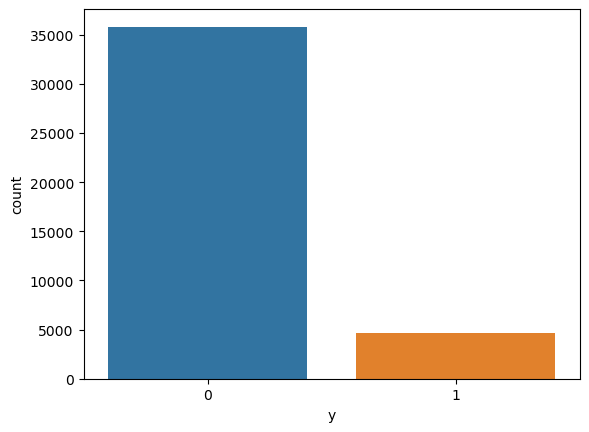

In [37]:
ax = sns.countplot(x=y,label="Count")     
S, N = y.value_counts()
print('Number of Client subscribed : ',S)
print('Number of Clients not subscribed  : ',N)


**As we can see from the plot that data is highly imbalanced. And we built model based on this dataset then I will be baised**

**To avoid this we will apply oversamplying technique SMOTE**

In [38]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(data_copy, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({0: 35824, 1: 4621})
Counter({0: 35824, 1: 35824})


Number of Client subscribed :  35824
Number of Clients not subscribed  :  35824


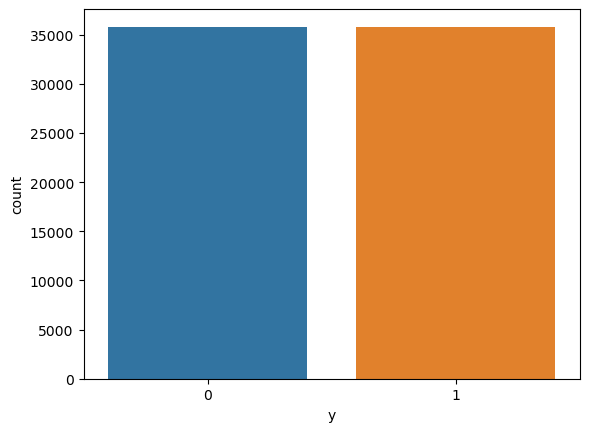

In [39]:
ax = sns.countplot(x=y,label="Count")     
S, N = y.value_counts()
print('Number of Client subscribed : ',S)
print('Number of Clients not subscribed  : ',N)

### After applying SMOTE, we can see that data is balanced
                

### Standardizing Data


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(x)

StandardScaler()

In [43]:
X = scaler.fit_transform(x)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (50153, 44)
X_test  (21495, 44)
y_train  (50153,)
y_test  (21495,)


#### Q.3. Build the following Supervised Learning models: 🡪5 marks
#### a. Logistic Regression
#### b. Decision Trees

## Supervised Learning


## Logistic Regression


Now we build a model. We start with our data set gradually proceeding with our analysis
In order to build a model, we do the following:1. Build the model2. Predict the values 3. Compute the accuracy measures 4. Tabulate the results 
                   

**1. Build the model**

In [46]:
from sklearn.linear_model import LogisticRegression


In [47]:
# Create logistic regression
lg = LogisticRegression()

In [48]:
lg.fit(X_train,y_train)

LogisticRegression()

In [49]:
# predict the values
y_pred = lg.predict(X_test)

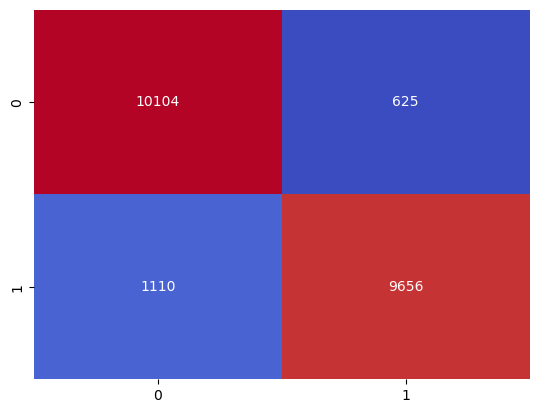

Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     10729
           1       0.94      0.90      0.92     10766

    accuracy                           0.92     21495
   macro avg       0.92      0.92      0.92     21495
weighted avg       0.92      0.92      0.92     21495

Accuracy of the model:  0.919283554314957


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, fmt='d', cmap="coolwarm", cbar=False)
plt.show()
 
print("Classification report: ")
 
print(classification_report(y_test,y_pred))
 
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)
plt.figure(figsize = (8,5))



**5. Tabulate the results**

In [51]:
from sklearn import metrics
# metrics module from the sklearn library in Python provides various functions for evaluating the performance of ML model
#It includes functions for  metrics such as accuracy, precision, recall, F1-score, and AUC score.
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Bagging_Meta_estimator = pd.Series({'Model': "Logistic Regression",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Bagging_Meta_estimator , ignore_index = True)

# view the result table
result_tabulation

C:\Users\Kunal s\AppData\Local\Temp\ipykernel_12728\4022838149.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(Bagging_Meta_estimator , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.919322,0.939208,0.896898,0.919284,0.917565


## Decision Tree


**1. Build the model**

In [52]:
from sklearn.tree import DecisionTreeClassifier
# build the model
DTclassifier = DecisionTreeClassifier(criterion="gini",random_state=10)


In [53]:
# fit the model
DTclassifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=10)

**2. Predict the values for the test set**

In [54]:
# predict the values
y_pred_DT  = DTclassifier.predict(X_test)

**3. Compute accuracy measures**

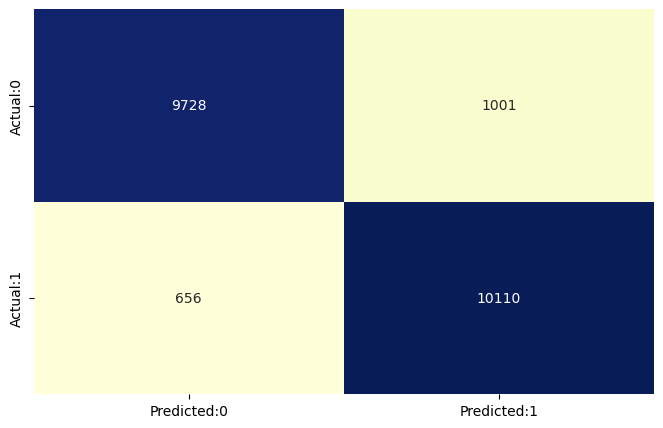

In [55]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_DT)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [56]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]               

In [57]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_DT)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10729
           1       0.91      0.94      0.92     10766

    accuracy                           0.92     21495
   macro avg       0.92      0.92      0.92     21495
weighted avg       0.92      0.92      0.92     21495



**5. Tabulate the results**

In [58]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
DT_metrices = pd.Series({'Model': "Decision Tree",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_DT),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_DT),

                  'f1-score':metrics.f1_score(y_test, y_pred_DT)})



# appending our result table
result_tabulation = result_tabulation.append(DT_metrices , ignore_index = True)

# view the result table
result_tabulation

C:\Users\Kunal s\AppData\Local\Temp\ipykernel_12728\2787678491.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(DT_metrices , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.919322,0.939208,0.896898,0.919284,0.917565
1,Decision Tree,0.922884,0.909909,0.939067,0.922912,0.924258


#### Q.4. Tabulate the performance metrics of all the above models, perform tuning of models and tell which model performs better in predicting if the client will subscribe to term deposit or not.

### KNN

**1. Build the model**

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 6)}


In [61]:
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

In [62]:
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5])})

In [63]:
knn_gscv.best_estimator_

KNeighborsClassifier(n_neighbors=2)

**2. Do predictions on the test set**

In [64]:
# predict the values
y_pred_knn  = knn_gscv.predict(X_test)

Before we compute the accuracy measures, let us plot the confusion matrix.

**3. Compute accuracy measures**

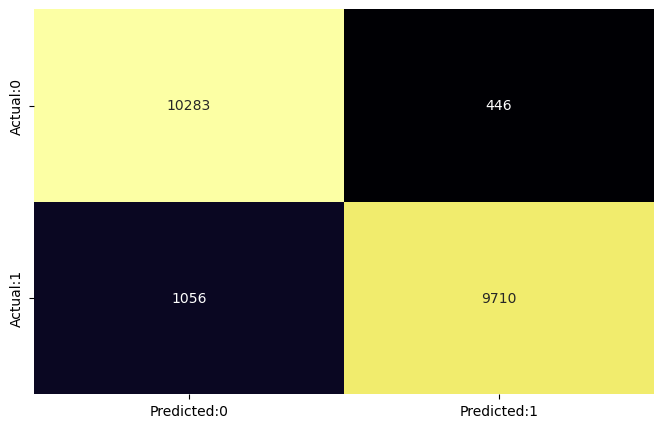

In [65]:
# compute the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="inferno", cbar=False)
plt.show()

In [66]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]                                                           

In [67]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_knn)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     10729
           1       0.96      0.90      0.93     10766

    accuracy                           0.93     21495
   macro avg       0.93      0.93      0.93     21495
weighted avg       0.93      0.93      0.93     21495



**4. Tabulate the results**

In [68]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
knn_metrics = pd.Series({'Model': "KNN",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_knn),
                 'Precision Score': metrics.precision_score(y_test, y_pred_knn),
                 'Recall Score': metrics.recall_score(y_test, y_pred_knn),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_knn),
                  'f1-score':metrics.f1_score(y_test, y_pred_knn)})



# appending our result table
result_tabulation = result_tabulation.append(knn_metrics , ignore_index = True)

# view the result table
result_tabulation

C:\Users\Kunal s\AppData\Local\Temp\ipykernel_12728\2225999439.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(knn_metrics , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.919322,0.939208,0.896898,0.919284,0.917565
1,Decision Tree,0.922884,0.909909,0.939067,0.922912,0.924258
2,KNN,0.930172,0.956085,0.901913,0.930123,0.928210


### Random Forest


**1. Build the model**

In [69]:
from sklearn.ensemble import RandomForestClassifier
# build the model
RFclassifier = RandomForestClassifier(n_estimators=100,random_state=10)


In [70]:
# fit the model
RFclassifier.fit(X_train, y_train)


RandomForestClassifier(random_state=10)

**2. Predict the values for the test set**

In [71]:
# predict the values
y_pred_RF  = RFclassifier.predict(X_test)

**3. Compute accuracy measures**

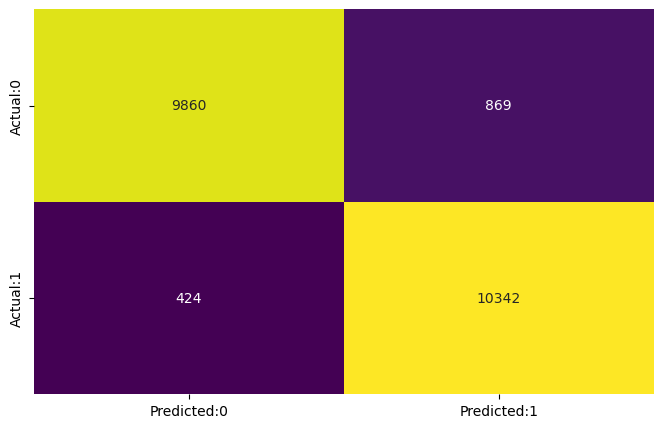

In [72]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_RF)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="viridis", cbar=False)
plt.show()

In [73]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]               

In [74]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_RF)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     10729
           1       0.92      0.96      0.94     10766

    accuracy                           0.94     21495
   macro avg       0.94      0.94      0.94     21495
weighted avg       0.94      0.94      0.94     21495



**5. Tabulate the results**

In [75]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'
# create a list of column names


# compiling the required information
RF_metrices = pd.Series({'Model': "Random Forest",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_RF),
                 'Precision Score': metrics.precision_score(y_test, y_pred_RF),
                 'Recall Score': metrics.recall_score(y_test, y_pred_RF),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_RF),

                  'f1-score':metrics.f1_score(y_test, y_pred_RF)})



# appending our result table
result_tabulation = result_tabulation.append(RF_metrices , ignore_index = True)

# view the result table
result_tabulation

C:\Users\Kunal s\AppData\Local\Temp\ipykernel_12728\4169536265.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(RF_metrices , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.919322,0.939208,0.896898,0.919284,0.917565
1,Decision Tree,0.922884,0.909909,0.939067,0.922912,0.924258
2,KNN,0.930172,0.956085,0.901913,0.930123,0.928210
3,Random Forest,0.939811,0.922487,0.960617,0.939846,0.941166


### Model Comparision

In [76]:
def convert_to_array(result_tabulation):
    score = np.array(result_tabulation)
    return score

# Call the function to convert the result tabulation to array
score = convert_to_array(result_tabulation)

# Define the next function to return 'score'
def next_fun(score):
    # Your code that uses 'score'
    return score

# Call the next function and store its return value in 'graph'
graph = next_fun(score)

# Now 'graph' contains the 'score' array, and you can proceed with plotting as before


## It can be seen from the result tabulation, that performance measures for the Random Forest is better than other models. 

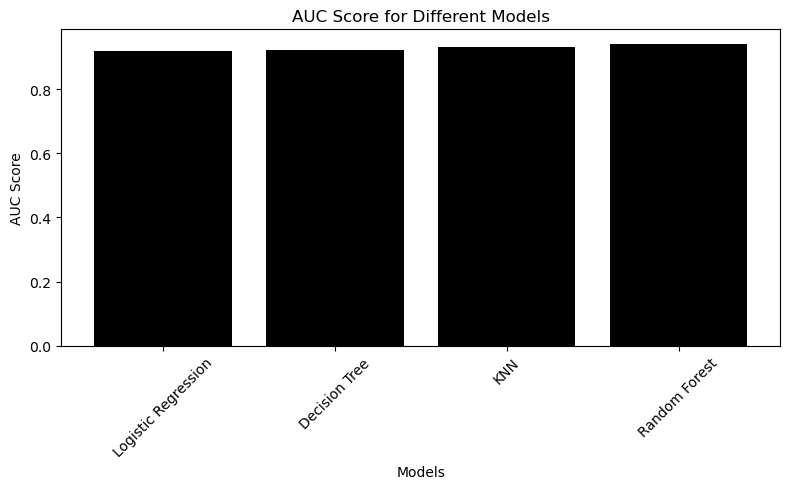

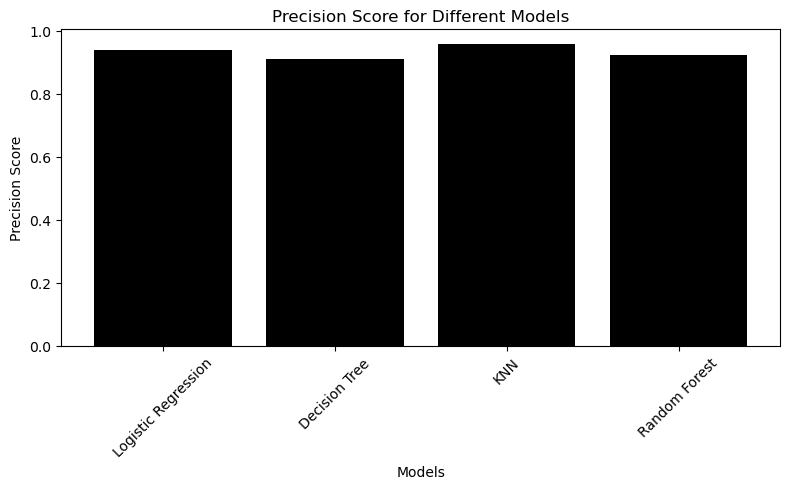

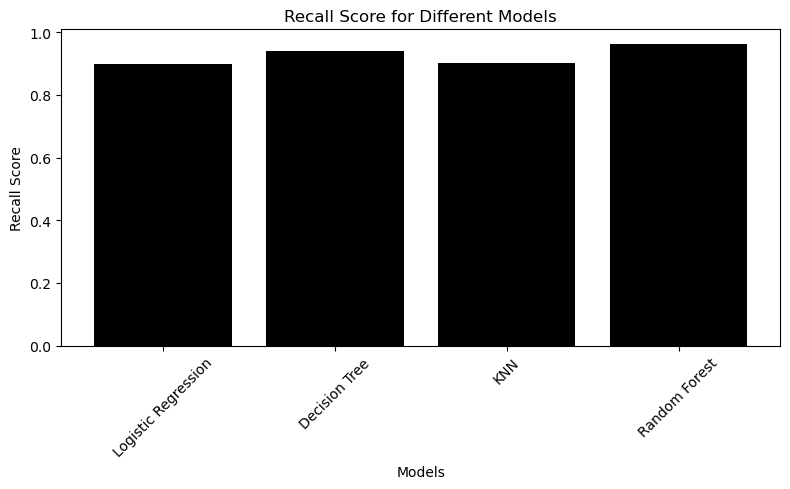

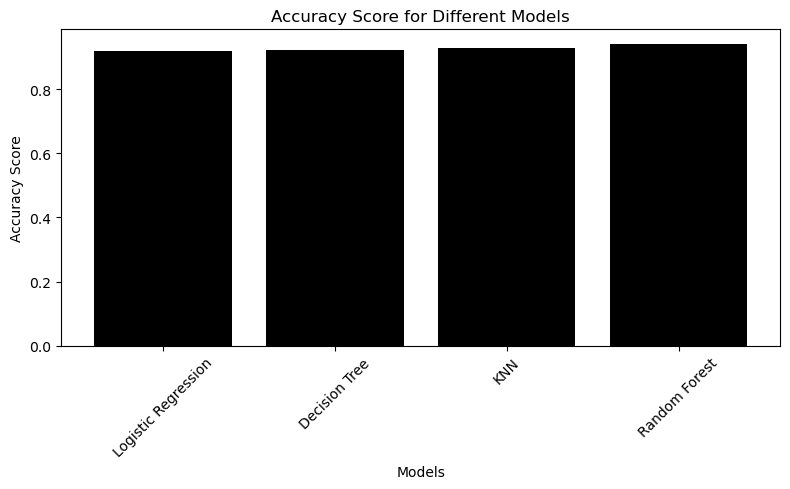

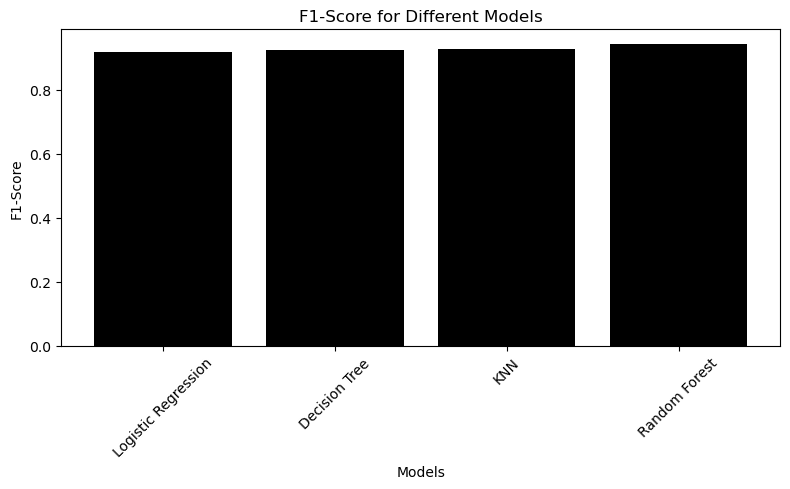

In [77]:

# Extract model names and scores
models = graph[:, 0]
scores = graph[:, 1:].astype(float)

# Define metrics
metrics = ['AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score', 'F1-Score']

# Plotting
num_models = len(models)
num_metrics = len(metrics)

for i in range(num_metrics):
    plt.figure(figsize=(8, 5))
    plt.bar(models, scores[:, i], color='black')
    plt.xlabel('Models')
    plt.ylabel(metrics[i])
    plt.title(f'{metrics[i]} for Different Models')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    


In [78]:
import numpy as np

# Define the models
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
scores = graph[:, 1:].astype(float)

# Calculate the average performance for each model
avg_scores = np.mean(scores, axis=1)


# Find the index of the model with the highest average performance
best_model_index = np.argmax(avg_scores)

# Print the best model and its average performance
print("Best Model:", models[best_model_index])
print("Average Performance:", avg_scores[best_model_index])


Best Model: Random Forest
Average Performance: 0.9407853003250943


##### Based on the evaluation of multiple machine learning models using various performance metrics including AUC score, precision score, recall score, accuracy score, and F1-score, the following conclusion can be drawn:

##### After analyzing the performance of the models including Logistic Regression, KNN, Decision Tree, and Random Forest, it has been determined that the Random Forest model outperforms the others in terms of predictive accuracy. Random Forest achieved the highest average performance across all evaluated metrics, indicating its effectiveness in predicting the target variable in the dataset.

##### So Random Forest Model performs better in predicting if the client will subscribe to term deposit or not



